# Teoría de la Información: Descriptores de los datos
***
Autor: Edgar Rios Linares  
<erlinares@gmail.com>  
Fecha: 25-Ago-2020  
Versión: 1.1
***
## Actividad 2
Calcular  frecuencias, a nivel de palabras, de  los siguientes documentos y responder las siguientes cuestiones:

Nota1: remover los símbolos de puntuación (comas, puntos,  signos de interrogación, etc.) y acentos del texto. Solo se deberán procesar las consideradas palabras.

Nota2: Las líneas que inician con el símbolo de almohadilla (#), no se deben incluir al procesamiento. Revisar los libros.

+ ¿Cuántas palabras hay en cada texto?
+ ¿Cuántas palabras diferentes (únicas) hay en el texto?
+ ¿Cuales son las palabras con frecuencia 1 (hapax legomena) en el texto, mostrar las primeras 100 palabras si es que las hay?
+ ¿Cuáles son las palabras más frecuentes (mayor frecuencia) , mostrar las primeras 100 palabras si es que las hay, en qué difieren en los textos?
+ ¿cuáles son las palabras de contenido  más frecuentes (palabras que tenga significado en sí mismas, p. ej. “casa”), mostrar las primeras 100 palabras si es que las hay?
+ Generar los histogramas de todos los documentos.  Para generar los histogramas ordenar las palabras léxicamente.

Archivos
+ <http://ingeotec.mx/~sabino/MCDI-PI/libro1.txt>
+ <http://ingeotec.mx/~sabino/MCDI-PI/libro2.txt>

***
## Código

In [1]:
# import library
import io
import collections
import unicodedata
import operator
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter

#Remove Accents function
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

#open file with special Characters & create list
specialChars = open("special_char.txt", "r", encoding="UTF-8").read()
listSpecialChars = specialChars.split()

#create array with files names
arrTxtFiles = ["libro1.txt","libro2.txt"]   
#array for results
resultsAnalysis={}
resultsAnalysisWordHapax={}
resultsAnalysisWordCommon={}
resultsAnalysisWordCommonFreq={}
countResults=0
#iterate array, count characters from each file
for i in arrTxtFiles: 
    listWords=[]
    dictTemp={}
    text = io.open(i, "r", encoding="UTF-8").readlines()
    #iterate array, count words from each file
    for x in text:
        #remove lines with #
        if x[0:2] == "\ufeff#":
            x = ""
        #remove accents
        #listWordsRow = remove_accents(x)
        #remove \n
#        listWordsRow = listWordsRow.rstrip()
        listWordsRow = x.rstrip()
        #convert all letters in lower
        listWordsRow = listWordsRow.lower()
        #delete special characters
        listWordsRow = ''.join(i for i in listWordsRow if not i in listSpecialChars)
        #create list of word without stop-words & remove accents
        stop_words = set(stopwords.words('spanish')) 
        word_tokens = word_tokenize(listWordsRow) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_sentence = [] 
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(remove_accents(w)) 
        listWords= listWords + filtered_sentence
    #frequency of words, and list of unique words
    c = Counter (listWords)
    resultsAnalysis[countResults+1]= [i, "total de palabras", sum(c.values())]
    resultsAnalysis[countResults+2]= [i,"total de palabras unicas", len (c)]
    #words (hapax legomena)
    sortList=sorted(c.items())
    sortDict=dict(sortList)
    countFromValue=0
    listWordfromvalue=[]
    for word, value in sortDict.items():
        if value == 1:
            countFromValue = countFromValue+1
            listWordfromvalue.append(word)
    resultsAnalysis[countResults+3]= [i,"palabras con frecuencia 1", countFromValue]
    #Add (hapax legomena) words in array
    resultsAnalysisWordHapax[i]=listWordfromvalue
    #Add 100 most common words in array    
    sortList=c.items()
    sorted_x = sorted(c.items(), key=operator.itemgetter(1),reverse=True )
    sortDict=dict(sorted_x[0:100])
    resultsAnalysisWordCommon[i]=sortDict
    #Add values (x,y) from most common words in array
    dictTemp["x"]= list (sortDict.keys())
    dictTemp["y"]= list (sortDict.values())
    resultsAnalysisWordCommonFreq[i]=dictTemp
    countResults=countResults+3   

# Resultado del Conteo de palabras

In [2]:
# Resultado del conteo de palabras
print ("{:<12} {:<27} {:<10} ".format('Archivo', 'Concepto', 'Valor')) 
for key, value in resultsAnalysis.items(): 
    file, concept,result = value 
    print ("{:<12} {:<27} {:<10} ".format(file, concept, result))  

Archivo      Concepto                    Valor      
libro1.txt   total de palabras           66487      
libro1.txt   total de palabras unicas    16268      
libro1.txt   palabras con frecuencia 1   9647       
libro2.txt   total de palabras           25481      
libro2.txt   total de palabras unicas    7910       
libro2.txt   palabras con frecuencia 1   5013       


# Resultado de palabras con frecuencia 1 (hapax legomena)

In [3]:
for i in resultsAnalysisWordHapax:
    listWords = list (resultsAnalysisWordHapax[i])
    print (i , " \n" , listWords[0:100], " \n")   

libro1.txt  
 ['abalanzaron', 'abalanzo', 'abalanzose', 'abandonando', 'abandonandolo', 'abandonarla', 'abandonarlo', 'abandonarme', 'abandonarnos', 'abandonaron', 'abandone', 'abaniquean', 'abarcan', 'abarcando', 'abatido', 'abatimiento', 'abatimientosi', 'abdicacion', 'aberracion', 'abjurado', 'abjurar', 'ablandar', 'abofeteada', 'abofetearon', 'abolladas', 'abominable', 'abominableanadio', 'abominacion', 'abominaciones', 'abominacionesanadio', 'abominara', 'abonando', 'abordo', 'aborrece', 'aborreceme', 'aborrecere', 'aborrecerias', 'aborrecerle', 'aborreces', 'aborrecieras', 'aborrecimiento', 'abovedada', 'abraces', 'abrasaba', 'abrasada', 'abrasadate', 'abrasador', 'abrasadora', 'abrasame', 'abrasara', 'abrasaran', 'abrasare', 'abraza', 'abrazaba', 'abrazado', 'abrazare', 'abrazas', 'abrelos', 'abren', 'abrese', 'abrevia', 'abreviada', 'abreviar', 'abreviatura', 'abriendole', 'abrieran', 'abrigaban', 'abrigan', 'abrigos', 'abrigues', 'abrira', 'abrirse', 'abrirusted', 'abro', 'abr

# Resultado de palabras más frecuentes (100)

In [4]:
for i in resultsAnalysisWordCommon:
    listWordsKeys = list (resultsAnalysisWordCommon[i].keys())
    listWordsValues = list (resultsAnalysisWordCommon[i].values())
    print (i , "palabras: \n" , listWordsKeys[0:100], " \n")
    print (i , "frecuencia:  \n" , listWordsValues[0:100], " \n")

libro1.txt palabras: 
 ['a', 'gloria', 'd', 'si', 'usted', 'dios', 'casa', 'juan', 'tan', 'despues', 'morton', 'bien', 'o', 'senor', 'alma', 'ser', 'dos', 'daniel', 'aqui', 'ojos', 'lantigua', 'hombre', 'ficobriga', 'pues', 'mano', 'dijo', 'mismo', 'corazon', 'toda', 'vida', 'angel', 'aquel', 'asi', 'gran', 'dia', 'todas', 'puede', 'decir', 'senorita', 'tiempo', 'mundo', 'fin', 'siempre', 'verdad', 'hijo', 'don', 'espiritu', 'caifas', 'religion', 'buenaventura', 'hacia', 'parece', 'aquella', 'madre', 'sino', 'solo', 'amor', 'cosas', 'cabeza', 'voz', 'oh', 'ver', 'fue', 'iglesia', 'idea', 'hija', 'padre', 'se', 'ti', 'luz', 'grande', 'noche', 'puedo', 'joven', 'aun', 'fe', 'cielo', 'amarillo', 'ahora', 'senora', 'como', 'tierra', 'cura', 'familia', 'manos', 'serafinita', 'hacer', 'tal', 'hermano', 'sr', 'cosa', 'sido', 'dicho', 'tres', 'paso', 'aunque', 'silvestre', 'modo', 'pobre', 'nombre']  

libro1.txt frecuencia:  
 [2675, 537, 481, 474, 359, 346, 264, 243, 234, 224, 223, 216, 207,

# Histogramas de las palabras más frecuentes (30)

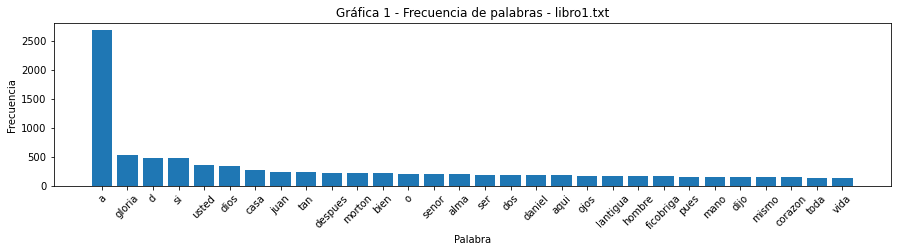

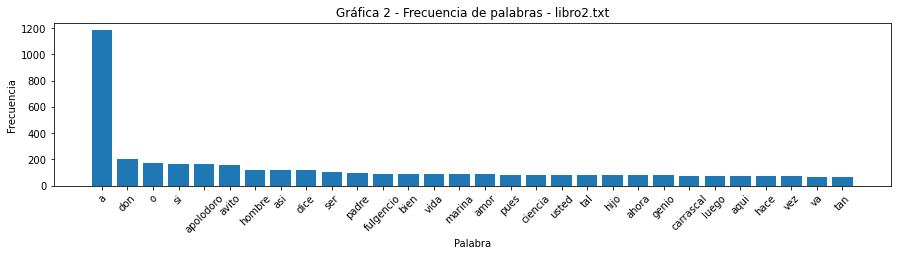

In [5]:
count=0
for i in resultsAnalysisWordCommonFreq:
    count=count+1
    #print (resultsAnalysisWordCommonFreq[i]["y"])
    x = list (resultsAnalysisWordCommonFreq[i]["x"][0:30])
    y = list (resultsAnalysisWordCommonFreq[i]["y"][0:30])
    #draw frequency
    %matplotlib inline 
    plt.figure(figsize=(15,3))
    plt.bar(x,y) 
    plt.title('Gráfica ' + str(count)+ ' - Frecuencia de palabras - ' + i) 
    plt.ylabel('Frecuencia') 
    plt.xlabel('Palabra') 
    plt.xticks(rotation=45)
    plt.show()

# Histogramas de las palabras más frecuentes ordenadas (30)
Se tomaron las 30 palabras con mayor frecuencia y se ordearon léxicamente

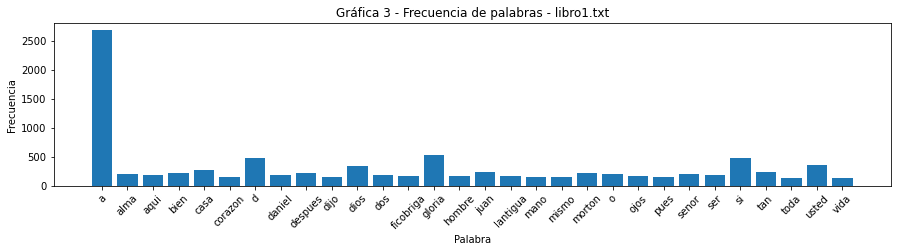

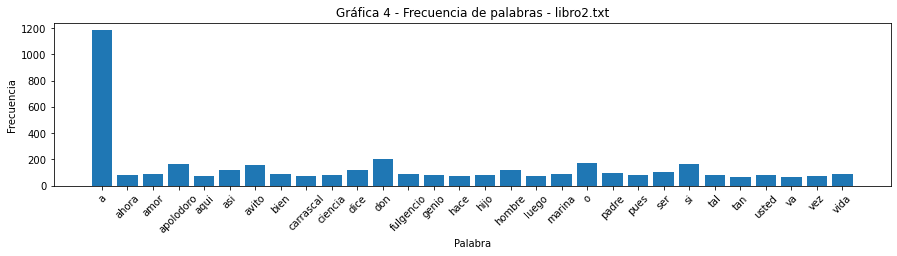

In [6]:
for i in resultsAnalysisWordCommonFreq:
    count=count+1
    #print (resultsAnalysisWordCommonFreq[i]["y"])
    x = list (resultsAnalysisWordCommonFreq[i]["x"][0:30])
    y = list (resultsAnalysisWordCommonFreq[i]["y"][0:30])
    zip_iterator = zip(x, y)
    dictOrderHex = dict(zip_iterator)
    dictItems = dictOrderHex.items()
    sortedItems = sorted (dictItems)
    dictOrder = dict(sortedItems)
    newX = list (dictOrder.keys())
    newY = list (dictOrder.values())
    #draw frequency
    %matplotlib inline 
    plt.figure(figsize=(15,3))
    plt.bar(newX,newY) 
    plt.title('Gráfica ' + str(count)+ ' - Frecuencia de palabras - ' + i) 
    plt.ylabel('Frecuencia') 
    plt.xlabel('Palabra') 
    plt.xticks(rotation=45)
    plt.show()    

## Interpretación
**Análisis del conteo de palabras observamos lo siguiente:**
1. El archivo "libro1.txt" contiene una mayor cantidad de palabras respecto al archivo "libro2.txt".
2. El archivo "libro1.txt" contiene una mayor cantidad de palabras únicas respecto al archivo "libro2.txt".
3. El archivo "libro1.txt" contiene una mayor cantidad de palabras con frecuencia 1 (hapax legomena) respecto al archivo "libro2.txt".  
4. De las 3 observaciones anteriores se deduce que el primer archivo es un texto más grande y emplea una diversidad mayor de palabras del español.
5. Analizando las primeras 100 palabras (hapax legomena) en orden lexicográfico de cada archivo, se observa que varias palabras provienen del mismo lema, ejemplo:  
"libro1.txt" {abalanzaron, abalanzo, abalanzandose} -> lema {abalanzar}  
"libro1.txt" {abandonando, abandonandolo, abandonarla, abandonarlo, abandonarme, abandonarnos, abandonaron, abandone} -> lema {abandonar}  
"libro2.txt" {acuerdas, acuerdase, acuerdate, acuerdo} -> lema {acordar}  
"libro2.txt" {acabado, acabamos, acaban, acabara ,acabaran ,acabaras ,acabare ,acabarla } -> lema {acabar}  

**Análisis de las 100 palabras con mayor frecuencia:**
+ La frecuencia de las palabras del archivo "libro1.txt" es mayor respecto al archivo "libro2.txt"
+ Hay palabras comunes en ambos archivos como: {a, d, don, si, usted, dios, casa, tan, despues, bien, o, ser, dos, aqui, hombre, pues, mismo, corazon, toda, vida, asi, dia, todas, puede, decir}, lo que nos indica la importancia en ambos documentos de dichas palabras. 
 
**Análisis de las gráficas de palabras con mayor frecuencia:**
+ Las gráficas 1 y 2 muestran las primeras 30 palabras con mayor frecuencia, ordenadas por frecuencia, para tener una mejor visualización de los datos. 
+ Las gráficas 3 y 4 muestran las mismas primeras 30 palabras con mayor frecuencia, ordenadas léxicamente, lo que permite observar la coincidencia de palabras con mayor frecuencia comunes en ambos textos {a, aqui, bien, hombre, o, pues, ser, si, tan, vida}

**Hallazgos:**
+ En un primer análisis la lógica del programa fue: 1) Eliminar los acentos y 2) Eliminar las palabras vacías (stop-words), pero el corpus de palabras utilizado de nltk (spanish) también considera palabras con acentos, por lo que palabras como (más y mas) las toma como diferentes y sólo la palabra (más) está dentro del corpus como stop-word.
+ Como lógica final se eligió: 1) Eliminar las palabras vacías (stop-words) y 2) Eliminar los acentos, debido a que el corpus de stop-word incluye palabras acentúadas, obteniéndose resulltados diferentes que pueden observarse en el archivo:  
data_count_word_v1.ipynb <<<https://github.com/erlinares/mcdi2020/blob/master/01_proc_inf/ses_02_act2/data_count_word_v1.ipynb>>>

**Conclusión:**
Para tener un buen análisis de palabras con significado es necesario:
+ Eliminar signos de puntuación.
+ Eliminar símbolos diacríticos.
+ Eliminar números.
+ Eliminar caracteres especiales
+ Normalizar a minúsculas
+ Como se identificó en el punto 5, otra técnica de transformación que se puede aplicar es lematizar palabras con el misno significado.
+ Y del hallazgo se debe tener en cuenta los acentos en las palabras, dependiendo del objetivo que se busque.

Código <https://github.com/erlinares/mcdi2020/tree/master/01_proc_inf/ses_02_act2>